# Initial instructions

In [1]:
! pip install kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d rounakbanik/the-movies-dataset

Saving kaggle.json to kaggle.json
 96% 219M/228M [00:02<00:00, 121MB/s]
100% 228M/228M [00:02<00:00, 102MB/s]


In [5]:
import os

In [ ]:
if not os.path.isdir('/content/drive/MyDrive/Rec/data/raw') :
    os.mkdir('/content/drive/MyDrive/Rec/data/raw')

In [ ]:
! unzip '/content/the-movies-dataset.zip' -d '/content/drive/MyDrive/Rec/data/raw'

Archive:  /content/the-movies-dataset.zip
  inflating: /content/drive/MyDrive/Rec/data/raw/credits.csv  
  inflating: /content/drive/MyDrive/Rec/data/raw/keywords.csv  
  inflating: /content/drive/MyDrive/Rec/data/raw/links.csv  
  inflating: /content/drive/MyDrive/Rec/data/raw/links_small.csv  
  inflating: /content/drive/MyDrive/Rec/data/raw/movies_metadata.csv  
  inflating: /content/drive/MyDrive/Rec/data/raw/ratings.csv  
  inflating: /content/drive/MyDrive/Rec/data/raw/ratings_small.csv  


In [4]:
raw_dir = '/content/drive/MyDrive/Rec/data/raw'

# Needed imports

In [6]:
import numpy as np
import pandas as pd
import json
import csv
import matplotlib.pyplot as plt
from ast import literal_eval

# Credits dataset

In [ ]:
credits = pd.read_csv(os.path.join(raw_dir, 'credits.csv'))
print('shape of credits dataset: {}'.format(credits.shape))
credits.head(3)

shape of credits dataset: (45476, 3)


cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   

                                                crew     id  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602

In [ ]:
credits.isnull().sum()

cast    0
crew    0
id      0
dtype: int64

In [ ]:
credits.isna().sum()

cast    0
crew    0
id      0
dtype: int64

In [ ]:
credits.nunique()

cast    43019
crew    44669
id      45432
dtype: int64

In [ ]:
credits.drop_duplicates(inplace=True)

## Extracting information from json strings

In [28]:
def get_text(text, obj='name'):
    text = literal_eval(text)
    if len(text) == 1:
        for i in text:
            return i[obj]
    else:
        s = []
        for i in text:
            s.append(str(i[obj]))
        return ', '.join(s)

In [ ]:
credits['name_crew'] = credits['crew'].apply(get_text, obj = "name")
credits['department_crew'] = credits['crew'].apply(get_text, obj = "department")
credits['gender_crew'] = credits['crew'].apply(get_text, obj = "gender")
credits['job_crew'] = credits['crew'].apply(get_text, obj = "job")
credits['profile_path_crew'] = credits['crew'].apply(get_text, obj = "profile_path")
credits['id_crew'] = credits['crew'].apply(get_text, obj = "id")

In [ ]:
credits['name_cast'] = credits['cast'].apply(get_text, obj = "name")
credits['order_cast'] = credits['cast'].apply(get_text, obj = "order")
credits['gender_cast'] = credits['cast'].apply(get_text, obj = "gender")
credits['credit_id_cast'] = credits['cast'].apply(get_text, obj = "credit_id")
credits['profile_path_cast'] = credits['cast'].apply(get_text, obj = "profile_path")
credits['id_cast'] = credits['cast'].apply(get_text, obj = "id")
credits['character_cast'] = credits['cast'].apply(get_text, obj = "character")

## Constructing the new dataframe and saving that

In [ ]:
clean_credits = credits.drop(["crew", "cast"], axis=1)

Checking the new dataframe

In [ ]:
print ('shape of the cleaned Credits dataset: {}'.format(clean_credits.shape))
clean_credits.head(3)

shape of the cleaned Credits dataset: (45439, 14)


id                                          name_crew  \
0    862  John Lasseter, Joss Whedon, Andrew Stanton, Jo...   
1   8844  Larry J. Franco, Jonathan Hensleigh, James Hor...   
2  15602  Howard Deutch, Mark Steven Johnson, Mark Steve...   

                                     department_crew  \
0  Directing, Writing, Writing, Writing, Writing,...   
1  Production, Writing, Sound, Directing, Editing...   
2                  Directing, Writing, Writing, Crew   

                                         gender_crew  \
0  2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2...   
1     2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2   
2                                         2, 2, 2, 2   

                                            job_crew  \
0  Director, Screenplay, Screenplay, Screenplay, ...   
1  Executive Producer, Screenplay, Original Music...   
2      Director, Characters, Writer, Sound Recordist   

                                   profile_path_crew  \
0  /7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg, /dTiVsuaTVTe...   
1  None, /l1c4UFD3g0HVWj5f0CxXAvMAGiT.jpg, /oLOtX...   
2  /68Vae1HkU1NxQZ6KEmuxIpno7c9.jpg, /6trChNn3o2b...   

                                             id_crew  \
0  7879, 12891, 7, 12892, 12893, 12894, 12895, 12...   
1  511, 876, 1729, 4945, 4951, 4952, 8023, 9967, ...   
2                       26502, 16837, 16837, 1551320   

                                           name_cast  \
0  Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...   
1  Robin Williams, Jonathan Hyde, Kirsten Dunst, ...   
2  Walter Matthau, Jack Lemmon, Ann-Margret, Soph...   

                                          order_cast  \
0           0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12   
1  0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, ...   
2                                0, 1, 2, 3, 4, 5, 6   

                                         gender_cast  \
0              2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2   
1  2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, 0...   
2                                2, 2, 1, 1, 1, 2, 2   

                                      credit_id_cast  \
0  52fe4284c3a36847f8024f95, 52fe4284c3a36847f802...   
1  52fe44bfc3a36847f80a7c73, 52fe44bfc3a36847f80a...   
2  52fe466a9251416c75077a8d, 52fe466a9251416c7507...   

                                   profile_path_cast  \
0  /pQFoyx7rp09CJTAb932F2g8Nlho.jpg, /uX2xVf6pMmP...   
1  /sojtJyIV3lkUeThD7A2oHNm8183.jpg, /7il5D76vx6Q...   
2  /xJVkvprOnzP5Zdh5y63y8HHniDZ.jpg, /chZmNRYMtqk...   

                                             id_cast  \
0  31, 12898, 7167, 12899, 12900, 7907, 8873, 111...   
1  2157, 8537, 205, 145151, 5149, 10739, 58563, 1...   
2         6837, 3151, 13567, 16757, 589, 16523, 7166   

                                      character_cast  
0  Woody (voice), Buzz Lightyear (voice), Mr. Pot...  
1  Alan Parrish, Samuel Alan Parrish / Van Pelt, ...  
2  Max Goldman, John Gustafson, Ariel Gustafson, ...

Saving the new .csv dataset

In [ ]:
clean_credits.to_csv('/content/drive/MyDrive/Rec/data/cleaned/clean_credits.csv', index=False)

# Keywords dataset

In [ ]:
keywords = pd.read_csv(os.path.join(raw_dir, "keywords.csv"))
print('shape of raw Keywores dataset: {}'.format(keywords.shape))
keywords.head(3)

shape of raw Keywores dataset: (46419, 2)


id                                           keywords
0    862  [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
1   8844  [{'id': 10090, 'name': 'board game'}, {'id': 1...
2  15602  [{'id': 1495, 'name': 'fishing'}, {'id': 12392...

In [ ]:
keywords.isna().sum()

id          0
keywords    0
dtype: int64

In [ ]:
keywords.isnull().sum()

id          0
keywords    0
dtype: int64

In [ ]:
keywords.nunique()

id          45432
keywords    25989
dtype: int64

In [ ]:
keywords.drop_duplicates(inplace=True)
print('shape of dataset after dropping duplicates: {}'.format(keywords.shape))

shape of dataset after dropping duplicates: (45432, 2)


## Extracting information from json strings

In [ ]:
keywords['name_keywords'] = keywords['keywords'].apply(get_text, obj = "name")
keywords['id_keywords'] = keywords['keywords'].apply(get_text, obj = "id")

## Constructing new dataframe and saving that

In [ ]:
clean_keywords = keywords.drop(["keywords"], axis=1)

Checking the new dataset

In [ ]:
print('shape of the cleaned data: {}'.format(clean_keywords.shape))
clean_keywords.head(3)

shape of the cleaned data: (45432, 3)


id                                      name_keywords  \
0    862  jealousy, toy, boy, friendship, friends, rival...   
1   8844  board game, disappearance, based on children's...   
2  15602  fishing, best friend, duringcreditsstinger, ol...   

                                         id_keywords  
0  931, 4290, 5202, 6054, 9713, 9823, 165503, 170...  
1         10090, 10941, 15101, 33467, 158086, 158091  
2                        1495, 12392, 179431, 208510

Saving the cleaned dataset as a .csv file

In [ ]:
clean_keywords.to_csv('/content/drive/MyDrive/Rec/data/cleaned/clean_keywords.csv', index=False)


# Metadata dataset

In [35]:
metadata = pd.read_csv(os.path.join(raw_dir, 'movies_metadata.csv'))
print('shape of the raw metadata dataset: {}'.format(metadata.shape))
metadata.head(3)

shape of the raw metadata dataset: (45466, 24)


<ipython-input-35-d8520c3ee68a>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv(os.path.join(raw_dir, 'movies_metadata.csv'))


adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   

     original_title                                           overview  ...  \
0         Toy Story  Led by Woody, Andy's toys live happily in his ...  ...   
1           Jumanji  When siblings Judy and Peter discover an encha...  ...   
2  Grumpier Old Men  A family wedding reignites the ancient feud be...  ...   

  release_date      revenue runtime  \
0   1995-10-30  373554033.0    81.0   
1   1995-12-15  262797249.0   104.0   
2   1995-12-22          0.0   101.0   

                                    spoken_languages    status  \
0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
2           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline             title  video  \
0                                                NaN         Toy Story  False   
1          Roll the dice and unleash the excitement!           Jumanji  False   
2  Still Yelling. Still Fighting. Still Ready for...  Grumpier Old Men  False   

  vote_average vote_count  
0          7.7     5415.0  
1          6.9     2413.0  
2          6.5       92.0  

[3 rows x 24 columns]

In [36]:
metadata.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [37]:
metadata.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [38]:
metadata.nunique()

adult                        5
belongs_to_collection     1698
budget                    1226
genres                    4069
homepage                  7673
id                       45436
imdb_id                  45417
original_language           92
original_title           43373
overview                 44307
popularity               44176
poster_path              45024
production_companies     22708
production_countries      2393
release_date             17336
revenue                   6863
runtime                    353
spoken_languages          1931
status                       6
tagline                  20283
title                    42277
video                        2
vote_average                92
vote_count                1820
dtype: int64

Histogram of the dataset

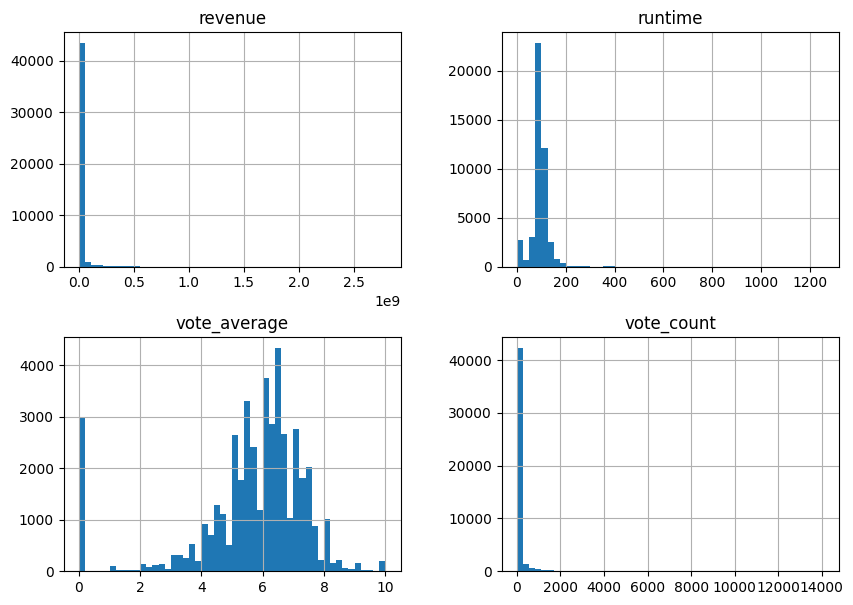

In [39]:
metadata.hist(bins=50, figsize=(10, 7))
plt.show()

## Removing entries with numeric name of comopanies or countries

In [40]:
def is_string_number(string):
    try:
        float(string)
        return True
    except ValueError:
        return False

In [41]:
for i in range(metadata.shape[0]):
    if is_string_number(metadata.loc[i, 'production_countries']) or is_string_number(metadata.loc[i, 'production_companies']):
        metadata.drop(index=i, inplace=True)
metadata.shape

(45460, 24)

In [42]:
metadata.drop_duplicates(inplace=True)
metadata.dropna(subset=['production_companies', 'production_countries'], inplace=True)

In [43]:
metadata = metadata.fillna("NaN value")


## Extracting information from json values

In [44]:
def get_text_nan(text, obj="name"):
    if(text == "NaN value"):
         return np.nan
    elif (isinstance(literal_eval(str(text)), float)):
        return np.nan
    else:
        text = literal_eval(str(text))
        for i in text:
            if(i == obj):
                return (text[i])

In [45]:
def text_getter(text, obj='name'):
    if(text == 'NaN value'):
         return np.nan
    elif (isinstance(literal_eval(str(text)), float)):
        return np.nan
    elif(isinstance(literal_eval(str(text)), list)):
        s = []
        for i in text:
            s.append(str(i[obj]))
        return ', '.join(s)
    else:
        text = literal_eval(str(text))
        for i in text:
            if(i == obj):
                return (text[i])

'belongs to collection' column

In [46]:
metadata['name_belongs_to_collection'] = metadata['belongs_to_collection'].apply(get_text_nan ,obj = "name")
metadata['id_belongs_to_collection'] = metadata['belongs_to_collection'].apply(get_text_nan ,obj = "id")
metadata['poster_path_belongs_to_collection'] = metadata['belongs_to_collection'].apply(get_text_nan ,obj = "poster_path")
metadata['backdrop_path_belongs_to_collection'] = metadata['belongs_to_collection'].apply(get_text_nan ,obj = "backdrop_path")

'genres' column

In [47]:
metadata['name_genres'] = metadata['genres'].apply(get_text ,obj = "name")
metadata['id_genres'] = metadata['genres'].apply(get_text ,obj = "id")

'production countries' column

In [48]:
metadata['name_production_countries'] = metadata['production_countries'].apply(get_text ,obj = "name")
metadata['iso_3166_1_production_companies'] = metadata['production_countries'].apply(get_text ,obj = "iso_3166_1")

'production companies' column

In [49]:
metadata['name_production_companies'] = metadata['production_companies'].apply(get_text ,obj = "name")
metadata['id_production_companies'] = metadata['production_companies'].apply(get_text ,obj = "id")


In [52]:
metadata = metadata.replace('NaN value', np.nan)

## Constructing the new dataframe and saving the new dataset

In [53]:
clean_metadata = metadata.drop(["spoken_languages" ,"genres" ,"production_countries" ,"belongs_to_collection"] ,axis=1)
print('shape of the cleaned dataset: {}'.format(clean_metadata.shape))
clean_metadata.head(3)

shape of the cleaned dataset: (45447, 30)


adult    budget                              homepage     id    imdb_id  \
0  False  30000000  http://toystory.disney.com/toy-story    862  tt0114709   
1  False  65000000                                   NaN   8844  tt0113497   
2  False         0                                   NaN  15602  tt0113228   

  original_language    original_title  \
0                en         Toy Story   
1                en           Jumanji   
2                en  Grumpier Old Men   

                                            overview popularity  \
0  Led by Woody, Andy's toys live happily in his ...  21.946943   
1  When siblings Judy and Peter discover an encha...  17.015539   
2  A family wedding reignites the ancient feud be...    11.7129   

                        poster_path  ... name_belongs_to_collection  \
0  /rhIRbceoE9lR4veEXuwCC2wARtG.jpg  ...       Toy Story Collection   
1  /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg  ...                        NaN   
2  /6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg  ...  Grumpy Old Men Collection   

  id_belongs_to_collection  poster_path_belongs_to_collection  \
0                  10194.0   /7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg   
1                      NaN                                NaN   
2                 119050.0   /nLvUdqgPgm3F85NMCii9gVFUcet.jpg   

   backdrop_path_belongs_to_collection                 name_genres  \
0     /9FBwqcd9IRruEDUrTdcaafOMKUq.jpg   Animation, Comedy, Family   
1                                  NaN  Adventure, Fantasy, Family   
2     /hypTnLot2z8wpFS7qwsQHW1uV8u.jpg             Romance, Comedy   

       id_genres name_production_countries  iso_3166_1_production_companies  \
0  16, 35, 10751  United States of America                               US   
1  12, 14, 10751  United States of America                               US   
2      10749, 35  United States of America                               US   

                           name_production_companies  id_production_companies  
0                            Pixar Animation Studios                        3  
1  TriStar Pictures, Teitler Film, Interscope Com...         559, 2550, 10201  
2                       Warner Bros., Lancaster Gate              6194, 19464  

[3 rows x 30 columns]

In [54]:
clean_metadata.to_csv('/content/drive/MyDrive/Rec/data/cleaned/clean_metadata.csv', index=False)